## 🔹 Load and Verify Dataset Structure

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob

# Set dataset path
dataset_path = "C:/Users/anujp/Desktop/Brain Tumor MRI Dataset/archive"

# Print dataset structure
for folder in os.listdir(dataset_path):
    print(f"📂 {folder}: {len(os.listdir(os.path.join(dataset_path, folder)))} files")


📂 Train: 4 files
📂 Val: 4 files


## 🔹 Count Images per Class

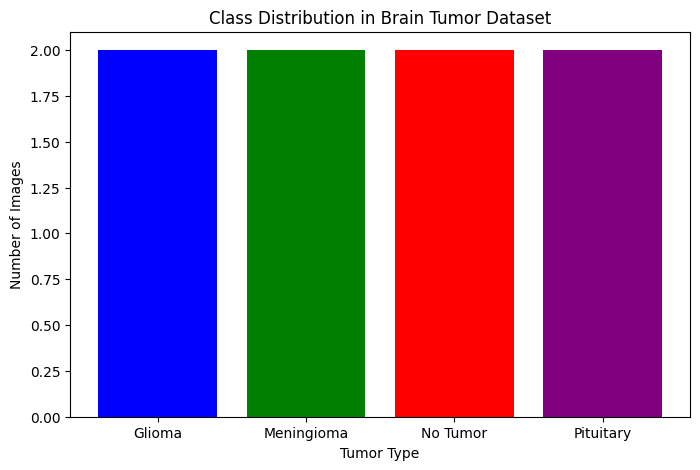

In [4]:
# Define class names
classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Count images in each class

data_distribution = {cls: len(os.listdir(f"{dataset_path}/Train/{cls.lower()}")) for cls in classes}

# Plot distribution
plt.figure(figsize=(8, 5))
plt.bar(data_distribution.keys(), data_distribution.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Brain Tumor Dataset")
plt.show()


## 🔹 Visualize Random Images from Each Class

In [6]:
# Function to display images from each class
def display_sample_images(class_name, num_images=5):
    image_paths = glob(f"{dataset_path}/Train/{class_name.lower()}/*.jpg")[:num_images]
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()

# Display images for each class
for cls in classes:
    display_sample_images(cls)


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

🔹 Check Sample Bounding Box Annotation

In [ ]:
# Load a random annotation file
annotation_file ="C:/Users/anujp/Desktop/Brain Tumor MRI Dataset/archive/Train/Glioma/labels/gg (1).txt"

# Read annotation file
with open(annotation_file, "r") as file:
    annotations = file.readlines()

# Print the first few lines
print("Bounding Box Annotations (YOLO Format):")
print("\n".join(annotations[:5]))


Bounding Box Annotations (YOLO Format):
0 0.567383 0.519531 0.189453 0.148438



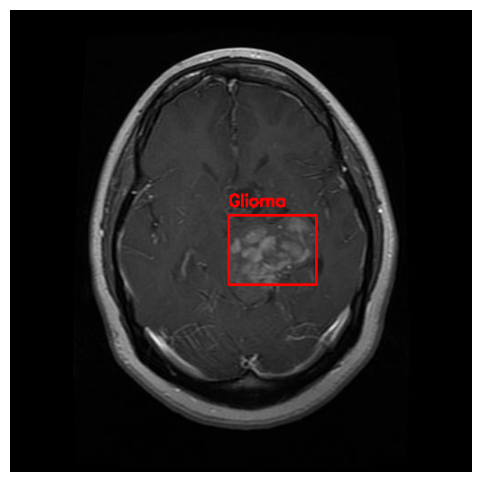

In [11]:
# Function to visualize bounding boxes
def plot_bounding_boxes(image_path, label_path):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Read bounding box labels
    with open(label_path, "r") as file:
        labels = file.readlines()

    # Draw bounding boxes
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x1, y1 = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
        x2, y2 = int((x_center + width / 2) * w), int((y_center + height / 2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, classes[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Test function on a random sample
sample_image = "C:/Users/anujp/Desktop/Brain Tumor MRI Dataset/archive/Train/Glioma/images/gg (1).jpg"
sample_label = "C:/Users/anujp/Desktop/Brain Tumor MRI Dataset/archive/Train/Glioma/labels/gg (1).txt"
plot_bounding_boxes(sample_image, sample_label)


In [ ]:
# Function to check image properties
def analyze_image_properties(folder):
    image_files = glob(f"{dataset_path}/Train/{folder.lower()}/*.jpg")
    img_shapes = [cv2.imread(img).shape for img in image_files[:100]]
    
    # Convert to DataFrame
    df = pd.DataFrame(img_shapes, columns=["Height", "Width", "Channels"])
    return df.describe()

# Display statistics for one class
analyze_image_properties("Glioma")


,Height,Width,Channels
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
